<a href="https://colab.research.google.com/github/santoshdhalwalkar/EDA/blob/main/edaforrealestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
#import drive from google
from google.colab import drive

In [240]:
# mount the drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [242]:
# read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/housing_data.csv")
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [243]:
#drop the unwanted column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [244]:
df.shape

(1460, 80)

In [245]:
# summary statistics

df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [246]:
# what is the info in my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [247]:
# finding null values
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [248]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 0 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'Alley': 1369 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrType': 872 null values
Column 'MasVnrArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null valu

In [249]:
# Renaming columns
df = df.rename(columns={
    'MSSubClass': 'PropertySubClass',
    'MSZoning': 'PropertyZone',
     'LotFrontage': 'PropertyFrontage',
    'LotArea': 'PropertyArea',
    'LotShape': 'PropertyShape',
    'LandContour': 'PropertyContour',
    'LotConfig': 'PropertyConfig',
    'LandSlope': 'PropertySlope',
    'MasVnrType': 'MasonryVeneerType',
    'MasVnrArea':'MasonryVeneerArea',
    'BsmtQual':'BasementQuality',
    'BsmtCond': 'BasementCondition',
    'BsmtExposure': 'BasementExposure',
    'BsmtFinType1':'BasementFinishType1',
    'BsmtFinType2':'BasementFinishType2',
    'BsmtFinSF1':'BasementFinishSquareFeet1',
    'BsmtFinSF2':'BasementFinishSquareFeet2',
    'BsmtUnfSF': 'BasementUnFinishSquareFeet',
    'TotalBsmtSF': 'TotalBasementSquareFeet',
    'GrLivArea': 'AboveGradeGroundLiving Area',
    'BsmtFullBath':'BasementFullBath',
    'BsmtHalfBath':'BasementHalfBath',
    'TotRmsAbvGrd': 'TotalRoomsAboveGrade',
    '1stFlrSF': 'FirstFloorSquareFeet',
    '2ndFlrSF':'SecondFloorSquareFeet',
    '3SsnPorch': 'ThreeSeasonPorchArea'

})

In [250]:
df.columns

Index(['PropertySubClass', 'PropertyZone', 'PropertyFrontage', 'PropertyArea',
       'Street', 'Alley', 'PropertyShape', 'PropertyContour', 'Utilities',
       'PropertyConfig', 'PropertySlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasonryVeneerType', 'MasonryVeneerArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BasementQuality', 'BasementCondition',
       'BasementExposure', 'BasementFinishType1', 'BasementFinishSquareFeet1',
       'BasementFinishType2', 'BasementFinishSquareFeet2',
       'BasementUnFinishSquareFeet', 'TotalBasementSquareFeet', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFloorSquareFeet',
       'SecondFloorSquareFeet', 'LowQualFinSF', 'AboveGradeGroundLiving Area',
       'BasementFullBath', 'BasementHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvG

In [251]:
# find unique values in label
df['PropertySubClass'].unique()

array(['SC60', 'SC20', 'SC70', 'SC50', 'SC190', 'SC45', 'SC90', 'SC120',
       'SC30', 'SC85', 'SC80', 'SC160', 'SC75', 'SC180', 'SC40'],
      dtype=object)

In [252]:
df['PropertySubClass'] = df['PropertySubClass'].replace({'SC60': '2-STORY 1946 & NEWER', 'SC20': '1-STORY 1946 & NEWER ALL STYLES', 'SC70': '2-STORY 1945 & OLDER','SC50': '1-1/2 STORY FINISHED ALL AGES','SC190': '2 FAMILY CONVERSION - ALL STYLES AND AGES', 'SC45': '1-1/2 STORY - UNFINISHED ALL AGES', 'SC90': 'DUPLEX - ALL STYLES AND AGES','SC120': '1-STORY PUD 1946 & NEWER', 'SC30': '1-STORY 1945 & OLDER', 'SC80': 'SPLIT OR MULTI-LEVEL', 'SC85': 'SPLIT FOYER', 'SC160': '2-STORY PUD - 1946 & NEWER', 'SC75': '2-1/2 STORY ALL AGES', 'SC180': 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                                   'SC40': '1-STORY W/FINISHED ATTIC ALL AGES'})
df['PropertySubClass'].value_counts()

PropertySubClass
1-STORY 1946 & NEWER ALL STYLES              536
2-STORY 1946 & NEWER                         299
1-1/2 STORY FINISHED ALL AGES                144
1-STORY PUD 1946 & NEWER                      87
1-STORY 1945 & OLDER                          69
2-STORY PUD - 1946 & NEWER                    63
2-STORY 1945 & OLDER                          60
SPLIT OR MULTI-LEVEL                          58
DUPLEX - ALL STYLES AND AGES                  52
2 FAMILY CONVERSION - ALL STYLES AND AGES     30
SPLIT FOYER                                   20
2-1/2 STORY ALL AGES                          16
1-1/2 STORY - UNFINISHED ALL AGES             12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER       10
1-STORY W/FINISHED ATTIC ALL AGES              4
Name: count, dtype: int64

In [253]:
df['PropertyZone'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [254]:
df['PropertyZone'] = df['PropertyZone'].replace({'RL': 'Residential Low-Density', 'RM': 'Residential Medium Density', 'C': 'Commercial', 'FV': 'Floating Village Residential','RH': 'Residential High-Density'})

In [255]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [256]:
# find unique values in label
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [257]:
# drop the column because have same data
df.drop(['Alley'], axis=1, inplace=True)


In [258]:
df.shape

(1460, 79)

In [259]:
# to understand better we replace the names of data

df['Street'] = df['Street'].replace({'Pave': 'Paved ', 'Grvl': 'Gravel'})

In [260]:
df['Street'].value_counts()

Street
Paved     1454
Gravel       6
Name: count, dtype: int64

In [261]:
# find unique values in label
df['PropertyShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

<Axes: xlabel='PropertyShape'>

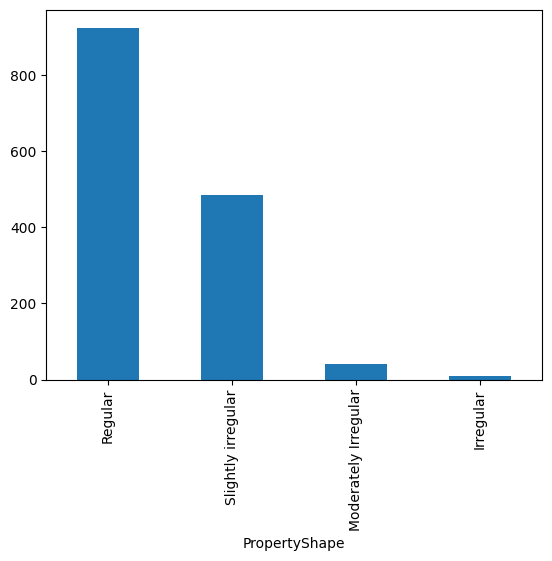

In [262]:
df['PropertyShape'] = df['PropertyShape'].replace({'IR1': 'Slightly irregular', 'Reg': 'Regular', 'IR2': 'Moderately Irregular', 'IR3': 'Irregular'})

df['PropertyShape'].value_counts().plot(kind='bar')

In [263]:
df['PropertyContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

<Axes: xlabel='PropertyContour'>

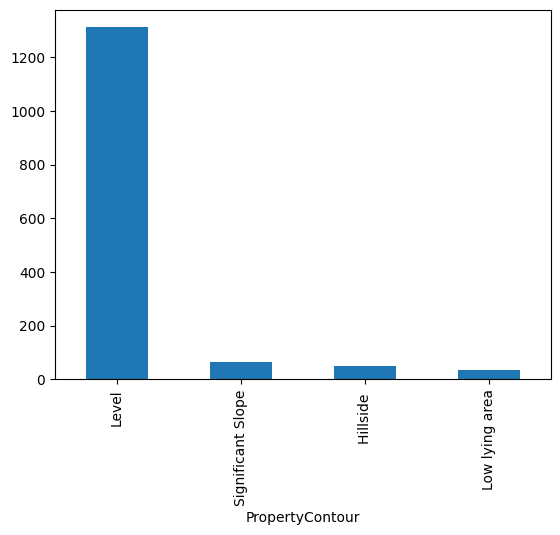

In [264]:
df['PropertyContour'] = df['PropertyContour'].replace({'Lvl': 'Level', 'Bnk': 'Significant Slope', 'Low': 'Low lying area', 'HLS': 'Hillside '})

df['PropertyContour'].value_counts().plot(kind='bar')

In [265]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [266]:
# to understand better we replace the names of data

df['Utilities'] = df['Utilities'].replace({'AllPub': 'All public Utilities ', 'NoSeWa': 'Electricity and Gas Only'})

In [267]:
df['PropertySlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [268]:
# to understand better we replace the names of data

df['PropertySlope'] = df['PropertySlope'].replace({'Gtl': 'Gentle slope ', 'Mod': 'Moderate slope ', 'Sev': 'Severe slope '})

In [269]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [270]:
# to understand better we replace the names of data

df['Neighborhood'] = df['Neighborhood'].replace({'Blmngtn ': 'Bloomington Heights', 'Blueste ': 'Bluestem', 'BrDale': 'Briardale', 'BrkSide': 'Brookside', 'ClearCr': 'Clear Creek', 'CollgCr': 'College Creek',
                                          'Crawfor ': 'Crawford', 'Edwards': 'Edwards', 'Gilbert': 'Gilbert', 'IDOTRR': 'Iowa DOT and Rail Road', 'MeadowV ': 'Meadow Village', 'Mitchel' : 'Mitchell',
                                          'Names': 'North Ames', 'NoRidge': 'Northridge', 'NPkVill': 'Northpark Villa', 'NridgHt': 'Northridge Heights', 'NWAmes': 'Northwest Ames', 'OldTown' : 'Old Town',
                                          'SWISU ': 'South & West of Iowa State University', 'Sawyer ': 'Sawyer', 'SawyerW ': 'Sawyer West', 'Somerst ': 'Somerset', 'StoneBr': 'Stone Brook', 'Timber' : 'Timberland',
                                          'Veenker ' : 'Veenker'})

In [271]:
df['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [272]:
df['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [273]:
# drop the column because have same data
df.drop(['Condition1'], axis=1, inplace=True)

In [274]:
# to understand better we replace the names of data

df['Condition2'] = df['Condition2'].replace({'Artery ': 'Adjacent to arterial street', 'Norm': 'Normal', 'RRNn ': 'Within 200 of North-South Railroad',  'Feedr': 'Adjacent to feeder street', 'PosN ': 'Near positive off-site feature park greenbelt etc', 'RRAn': 'Adjacent to North-South Railroad', 'RRAe': 'Adjacent to East-West Railroad', 'PosA': 'Adjacent to positive off-site feature '})

In [275]:
df['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [276]:
df['BldgType'] = df['BldgType'].replace({'1Fam': 'Single-family Detached ', '2fmCon': 'Two-family Conversion originally built as one-family dwelling', 'Duplex': 'Duplex', 'TwnhsE': 'Townhouse End Unit', 'Twnhs': 'Townhouse Inside Unit'})

In [277]:
df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [278]:
df['HouseStyle'] = df['HouseStyle'].replace({'2Story': 'Two-story ', '1Story': '1Story One story', '1.5Fin': 'One and one-half story 2nd level finished', '1.5Unf': 'One and one-half story 2nd level unfinished', 'SFoyer': 'Split Foyer', 'SLvl': 'Split Level', '2.5Unf': 'Two and one-half story 2nd level unfinished',
'2.5Fin': 'Two and one-half story 2nd level finished'})

In [279]:
df['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

In [280]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [281]:
# drop the column because have same data
df.drop(['OverallCond'], axis=1, inplace=True)

In [282]:
df['OverallQual'] = df['OverallQual'].replace({'1': 'Very Poor', '2': 'Poor ', '3': 'Fair','4': 'Below Average', '5': 'Average ', '6': 'Above Average','7': 'Good','8': 'Very Good', '9': 'Excellent ', '10': 'Very Excellent'})

In [283]:
df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [284]:
df['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [285]:
df['RoofMatl'] = df['RoofMatl'].replace({'ClyTile ': 'Clay or Tile', 'CompShg ': 'Standard (Composite) Shingle  ', 'Membran ': 'Membrane','Metal ': 'Metal Average', 'Roll ': 'Roll  ', 'Tar&Grv': 'Gravel & Tar','WdShake ': 'Wood Shakes','WdShngl ': 'Wood Shingles'})

In [286]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [287]:
df['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [288]:
# drop the column because have same data
df.drop(['Exterior2nd'], axis=1, inplace=True)

In [289]:
df.columns

Index(['PropertySubClass', 'PropertyZone', 'PropertyFrontage', 'PropertyArea',
       'Street', 'PropertyShape', 'PropertyContour', 'Utilities',
       'PropertyConfig', 'PropertySlope', 'Neighborhood', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasonryVeneerType',
       'MasonryVeneerArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BasementQuality', 'BasementCondition', 'BasementExposure',
       'BasementFinishType1', 'BasementFinishSquareFeet1',
       'BasementFinishType2', 'BasementFinishSquareFeet2',
       'BasementUnFinishSquareFeet', 'TotalBasementSquareFeet', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFloorSquareFeet',
       'SecondFloorSquareFeet', 'LowQualFinSF', 'AboveGradeGroundLiving Area',
       'BasementFullBath', 'BasementHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotalRoomsAboveGrade',
       'Fu

In [290]:
df['MasonryVeneerType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [291]:
df['MasonryVeneerType'] = df['MasonryVeneerType'].replace({'BrkFace ': 'Brick Veneer', 'Stone ': 'Stone Veneer', 'BrkCmn ': 'Common Brick'})

In [292]:
df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [293]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [294]:
df['ExterQual'] = df['ExterQual'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [295]:
df['ExterCond'] = df['ExterCond'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [296]:
df['BasementQuality'].unique()

array(['Gd', 'TA', 'Ex', 'No', 'Fa'], dtype=object)

In [297]:
df['BasementQuality'] = df['BasementQuality'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [298]:
df['BasementCondition'].unique()

array(['TA', 'Gd', 'No', 'Fa', 'Po'], dtype=object)

In [299]:
df['BasementCondition'] = df['BasementCondition'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor','No': 'No'})

In [301]:
df['BasementExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [302]:
df['BasementExposure'] = df['BasementExposure'].replace({'Gd': 'Good Exposure', 'Av': 'Average Exposure ', 'Mn': 'Mimimum Exposure','No ': 'No Exposure'})

In [303]:
df['BasementFinishType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No', 'LwQ'], dtype=object)

In [ ]:
# to understand better we replace the names of data

df['BasementFinishType1'] = df['BasementFinishType1'].replace({'GLQ': 'Good Living Quarters', 'ALQ': 'Average Living Quarters', 'Unf': 'Unfinished', 'Rec': 'Average Rec Room','BLQ': ' Below Average Living Quarters', 'nan': 'No Basement','LwQ': 'Low Quality'})

In [305]:
# drop the column because have same data
df.drop(['BasementFinishType2'], axis=1, inplace=True)

In [306]:
# drop the column because have same data
df.drop(['BasementFinishSquareFeet2'], axis=1, inplace=True)

In [307]:
df['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [ ]:
df['HeatingQC'] = df['HeatingQC'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor'})

In [308]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
df['Electrical'] = df['Electrical'].replace({'SBrkr ': 'Standard Circuit Breakers & Romex', 'FuseF': 'FuseF', '60 AMP Fuse Box and mostly Romex wiring': 'FuseP','60 AMP Fuse Box and mostly knob & tube wiring': 'Fair','Mix': 'Mixed'})

In [310]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'No', 'Ex', 'Po'], dtype=object)

In [311]:
df['GarageQual'] = df['GarageQual'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor','No': 'No'})

In [312]:
df['GarageCond'].unique()

array(['TA', 'Fa', 'No', 'Gd', 'Po', 'Ex'], dtype=object)

In [313]:
df['GarageQual'] = df['GarageQual'].replace({'Ex ': 'Excellent', 'Gd': 'Good', 'TA': 'Average/Typical ','Fa': 'Fair' ,'Po': 'Poor','No': 'No'})

In [315]:
df['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [316]:
df['SaleCondition'] = df['SaleCondition'].replace({'Normal': 'Normal', ' Abnorml': ' Abnorml', 'AdjLand': 'Adjoining Land Purchase', 'Alloca ': 'Allocation ', 'Family ': 'Sale between family members', 'Partial': 'Home was not completed '})

In [317]:
# finding null values
df.isnull().sum()

PropertySubClass    0
PropertyZone        0
PropertyFrontage    0
PropertyArea        0
Street              0
                   ..
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 74, dtype: int64

In [318]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'PropertySubClass': 0 null values
Column 'PropertyZone': 0 null values
Column 'PropertyFrontage': 0 null values
Column 'PropertyArea': 0 null values
Column 'Street': 0 null values
Column 'PropertyShape': 0 null values
Column 'PropertyContour': 0 null values
Column 'Utilities': 0 null values
Column 'PropertyConfig': 0 null values
Column 'PropertySlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'MasonryVeneerType': 872 null values
Column 'MasonryVeneerArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
Column 'BasementQuality': 0 null values
Column 'BasementCondition': 0 null values
Col

In [319]:
df['MasonryVeneerType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [320]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [321]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [322]:
# Find the mode for categorical data
mode=df['Electrical'].mode()[0]  # to find the means of the column
mode

'SBrkr'

In [323]:
#fill the null values with mode
df['Electrical'].fillna(value=mode, inplace=True)


In [324]:
# Find the mean Values
mean=df['GarageYrBlt'].mean()  # to find the means of the column
mean



1978.5061638868744

In [325]:
# Find the nmedian values
md=df['GarageYrBlt'].median()  # to find the median of the column
md

1980.0

In [326]:
# replace the with the median values

df['GarageYrBlt'].fillna(value=md, inplace=True)

In [327]:
# Find the mode for categorical data
mode=df['MasonryVeneerType'].mode()[0]  # to find the means of the column
mode

'BrkFace'

In [328]:
#fill the null values with mode
df['MasonryVeneerType'].fillna(value=mode, inplace=True)

In [329]:
# what is the info in my data after replacing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PropertySubClass             1460 non-null   object 
 1   PropertyZone                 1460 non-null   object 
 2   PropertyFrontage             1460 non-null   int64  
 3   PropertyArea                 1460 non-null   int64  
 4   Street                       1460 non-null   object 
 5   PropertyShape                1460 non-null   object 
 6   PropertyContour              1460 non-null   object 
 7   Utilities                    1460 non-null   object 
 8   PropertyConfig               1460 non-null   object 
 9   PropertySlope                1460 non-null   object 
 10  Neighborhood                 1460 non-null   object 
 11  Condition2                   1460 non-null   object 
 12  BldgType                     1460 non-null   object 
 13  HouseStyle        

In [330]:
# Transpose  the data have a different look at the data
df.head().T

,0,1,2,3,4
PropertySubClass,2-STORY 1946 & NEWER,1-STORY 1946 & NEWER ALL STYLES,2-STORY 1946 & NEWER,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER
PropertyZone,Residential Low-Density,Residential Low-Density,Residential Low-Density,Residential Low-Density,Residential Low-Density
PropertyFrontage,65,80,68,60,84
PropertyArea,8450,9600,11250,9550,14260
Street,Paved,Paved,Paved,Paved,Paved
...,...,...,...,...,...
MoSold,Feb,May,Sep,Feb,Dec
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [331]:
df = df.drop_duplicates()
df.count()

PropertySubClass    1460
PropertyZone        1460
PropertyFrontage    1460
PropertyArea        1460
Street              1460
                    ... 
MoSold              1460
YrSold              1460
SaleType            1460
SaleCondition       1460
SalePrice           1460
Length: 74, dtype: int64

In [332]:
# find and print null values
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'PropertySubClass': 0 null values
Column 'PropertyZone': 0 null values
Column 'PropertyFrontage': 0 null values
Column 'PropertyArea': 0 null values
Column 'Street': 0 null values
Column 'PropertyShape': 0 null values
Column 'PropertyContour': 0 null values
Column 'Utilities': 0 null values
Column 'PropertyConfig': 0 null values
Column 'PropertySlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'MasonryVeneerType': 0 null values
Column 'MasonryVeneerArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
Column 'BasementQuality': 0 null values
Column 'BasementCondition': 0 null values
Colum

In [355]:
df.shape

(1399, 232)

In [333]:
# indentify numberical and categorical data
num_columns = df.select_dtypes(include=['number']).columns.to_list()
cat_columns = df.select_dtypes(include=['object']).columns.to_list()

In [334]:
num_columns

['PropertyFrontage',
 'PropertyArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasonryVeneerArea',
 'BasementFinishSquareFeet1',
 'BasementUnFinishSquareFeet',
 'TotalBasementSquareFeet',
 'FirstFloorSquareFeet',
 'SecondFloorSquareFeet',
 'LowQualFinSF',
 'AboveGradeGroundLiving Area',
 'BasementFullBath',
 'BasementHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotalRoomsAboveGrade',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ThreeSeasonPorchArea',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [335]:
cat_columns

['PropertySubClass',
 'PropertyZone',
 'Street',
 'PropertyShape',
 'PropertyContour',
 'Utilities',
 'PropertyConfig',
 'PropertySlope',
 'Neighborhood',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasonryVeneerType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BasementQuality',
 'BasementCondition',
 'BasementExposure',
 'BasementFinishType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [339]:
# import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder


In [340]:
# Select only the categorical ordinal columns
categorical_ordcolumns = ['ExterQual', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'KitchenQual','BasementCondition', 'BasementQuality',
                   'FireplaceQu','GarageQual', 'GarageCond', 'SaleCondition',]
encoder = OrdinalEncoder()



# Fit the encoder to the categorical columns
encoder.fit(df[categorical_ordcolumns])



df[categorical_ordcolumns] = encoder.transform(df[categorical_ordcolumns])




In [341]:
# To find nominal catgorical columns
cat_nominalcolumns = df.select_dtypes(include=['object']).columns.to_list()
cat_nominalcolumns

['PropertySubClass',
 'PropertyZone',
 'Street',
 'PropertyShape',
 'PropertyContour',
 'Utilities',
 'PropertyConfig',
 'PropertySlope',
 'Neighborhood',
 'RoofMatl',
 'Exterior1st',
 'MasonryVeneerType',
 'ExterCond',
 'Foundation',
 'BasementExposure',
 'BasementFinishType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType']

In [343]:
# convert object data into int format
df= pd.get_dummies(df, columns=['PropertySubClass', 'PropertyZone',  'Street',  'PropertyShape',  'PropertyContour',  'Utilities',  'PropertyConfig',  'PropertySlope',  'Neighborhood',  'RoofMatl',  'Exterior1st',  'MasonryVeneerType',
 'ExterCond',  'Foundation',  'BasementExposure',  'BasementFinishType1',  'Heating',  'HeatingQC',  'CentralAir',  'Electrical',  'Functional',  'GarageType',  'GarageFinish',
 'PavedDrive',  'PoolQC',  'Fence',  'MiscFeature',  'MoSold',  'SaleType'],  dtype=int)

In [344]:
cat_columns = df.select_dtypes(include=['object']).columns.to_list()
cat_columns

[]

In [345]:
df

,PropertyFrontage,PropertyArea,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasonryVeneerArea,...,MoSold_Sep,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65,8450,5.0,1.0,7.0,7,2003,2003,1.0,196,...,0,0,0,0,0,0,0,0,0,1
1,80,9600,5.0,1.0,0.0,6,1976,1976,1.0,0,...,0,0,0,0,0,0,0,0,0,1
2,68,11250,5.0,1.0,7.0,7,2001,2002,1.0,162,...,1,0,0,0,0,0,0,0,0,1
3,60,9550,5.0,1.0,7.0,7,1915,1970,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,84,14260,5.0,1.0,7.0,8,2000,2000,1.0,350,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,5.0,1.0,7.0,6,1999,2000,1.0,0,...,0,0,0,0,0,0,0,0,0,1
1456,85,13175,5.0,1.0,0.0,6,1978,1988,1.0,119,...,0,0,0,0,0,0,0,0,0,1
1457,66,9042,5.0,1.0,7.0,7,1941,2006,1.0,0,...,0,0,0,0,0,0,0,0,0,1
1458,68,9717,5.0,1.0,0.0,5,1950,1996,3.0,0,...,0,0,0,0,0,0,0,0,0,1


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 232 entries, PropertyFrontage to SaleType_WD
dtypes: float64(13), int64(219)
memory usage: 2.6 MB


In [346]:
# summary statistics

df.describe()

,PropertyFrontage,PropertyArea,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasonryVeneerArea,...,MoSold_Sep,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,4.982877,1.165068,2.584932,6.099315,1971.267808,1984.865753,1.410274,103.117123,...,0.043151,0.029452,0.002740,0.001370,0.006164,0.003425,0.003425,0.083562,0.002055,0.867808
std,34.664304,9981.264932,0.275293,0.628988,3.122852,1.382997,30.202904,20.645407,0.834998,180.731373,...,0.203266,0.169128,0.052289,0.036999,0.078298,0.058440,0.058440,0.276824,0.045299,0.338815
min,0.000000,1300.000000,0.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,7553.500000,5.000000,1.000000,0.000000,5.000000,1954.000000,1967.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,63.000000,9478.500000,5.000000,1.000000,1.000000,6.000000,1973.000000,1994.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,79.000000,11601.500000,5.000000,1.000000,7.000000,7.000000,2000.000000,2004.000000,1.000000,164.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,313.000000,215245.000000,7.000000,4.000000,7.000000,10.000000,2010.000000,2010.000000,5.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [348]:
df.head()

,PropertyFrontage,PropertyArea,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,MasonryVeneerArea,...,MoSold_Sep,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65,8450,5.0,1.0,7.0,7,2003,2003,1.0,196,...,0,0,0,0,0,0,0,0,0,1
1,80,9600,5.0,1.0,0.0,6,1976,1976,1.0,0,...,0,0,0,0,0,0,0,0,0,1
2,68,11250,5.0,1.0,7.0,7,2001,2002,1.0,162,...,1,0,0,0,0,0,0,0,0,1
3,60,9550,5.0,1.0,7.0,7,1915,1970,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,84,14260,5.0,1.0,7.0,8,2000,2000,1.0,350,...,0,0,0,0,0,0,0,0,0,1


In [354]:
df.shape

(1399, 232)

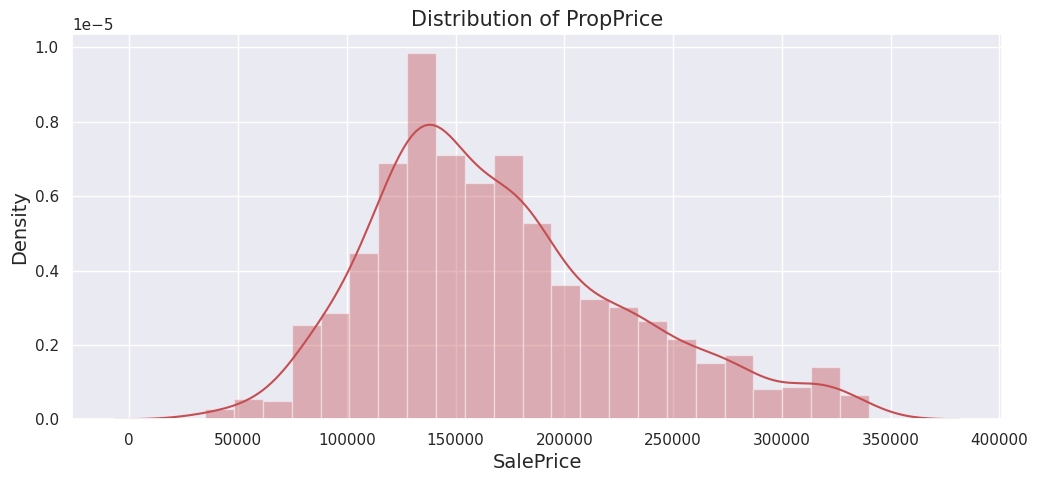

In [359]:
# Distribution of the SalePrice

plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df['SalePrice'], color=('r'))
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of PropPrice", fontsize = 15)
plt.show()

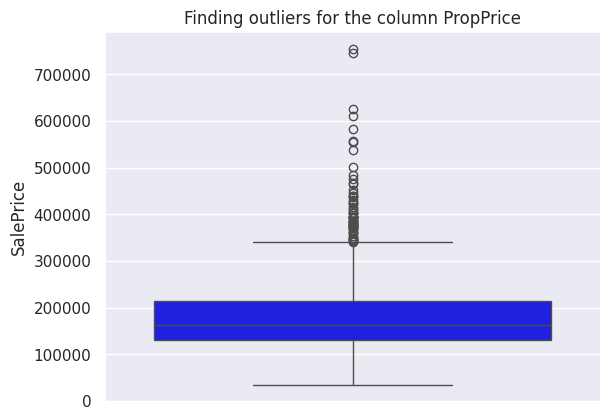

In [351]:
sns.boxplot(y=df["SalePrice"], color='blue')
plt.title('Finding outliers for the column PropPrice')
plt.show()

In [353]:
# Remove outilers
print("Old Shape: ", df.shape)

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
print("Q1: ", Q1, "\nQ3: ",Q3, "\nIQR:",IQR)


lower = Q1 - 1.5 * IQR
lower_array = df['SalePrice'] <= lower
print("Lower Bound:", lower)
print(lower_array.sum())

upper = Q3 + 1.5 * IQR
upper_array = df['SalePrice'] >= upper
print("Upper Bound:", upper)
print(upper_array.sum())

df = df[~(lower_array | upper_array)]


print("New Shape: ", df.shape)

Old Shape:  (1460, 232)
Q1:  129975.0 
Q3:  214000.0 
IQR: 84025.0
Lower Bound: 3937.5
0
Upper Bound: 340037.5
61
New Shape:  (1399, 232)


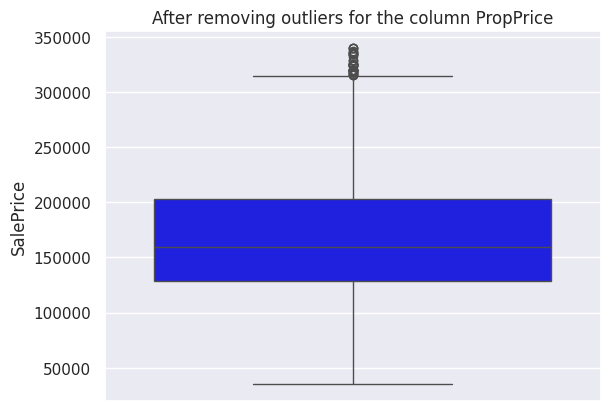

In [356]:
# After Rmoving outilers boxplot
sns.boxplot(y=df["SalePrice"], color='blue')
plt.title('After removing outliers for the column PropPrice')
plt.show()

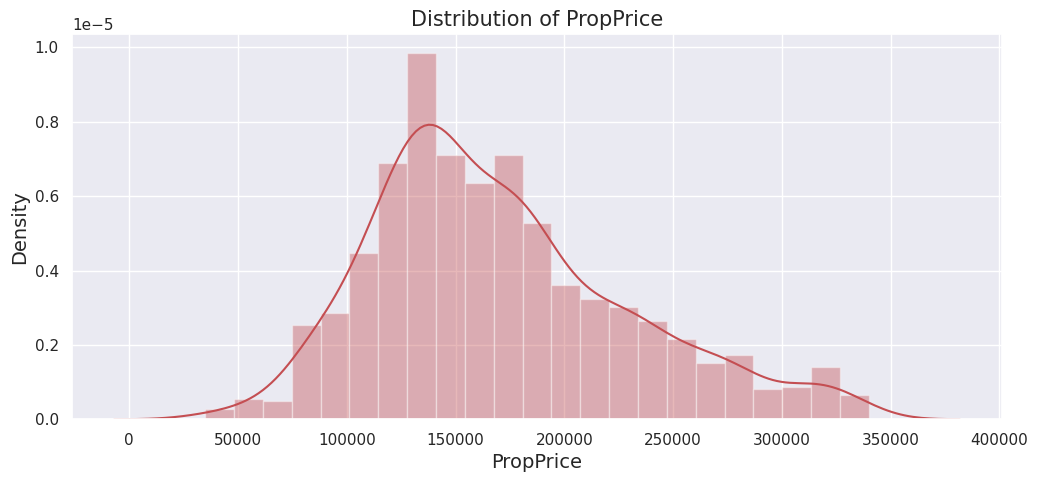

In [357]:
# Distribution of the SalePrice

plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df['SalePrice'], color=('r'))
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of PropPrice", fontsize = 15)
plt.show()

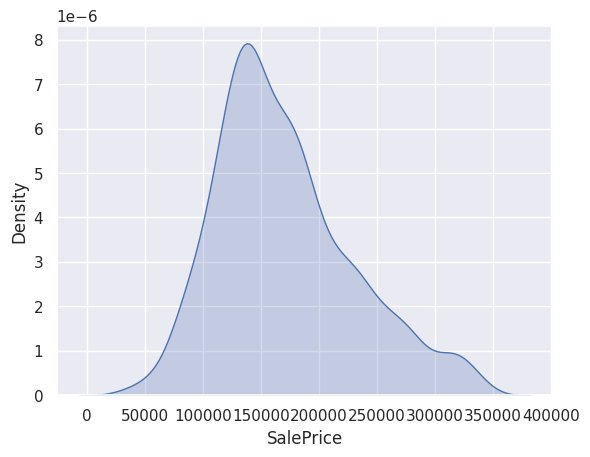

In [360]:
# Create the KDE plot
sns.kdeplot(df['SalePrice'], shade=True)

# Show the plot
plt.show()

In [ ]:
# Create a list of columns to plot
columns_to_plot = ['PropertyClass', 'PropertySize', 'OverallQual', 'YearBuilt', 'GardenView',  'SaleYr', 'YearRemodAdd', 'BasementFinishedArea'
                    ,'FirstFloorSquareFeet', 'SecondFloorSquareFeet']

# Determine the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 17))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if col in df.columns:
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

import math

# Filter for columns with int and float data types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Number of columns per row
cols_per_row = 5

# Calculate the number of rows needed
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

# Flatten axes array to make indexing easier
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df[col], kde=True, color="green", edgecolor='black', linewidth=1.5, ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:

# Filter for columns with int and float data types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Number of columns per row
cols_per_row = 7

# Calculate the number of rows needed
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(14,3 * num_rows))

# Flatten axes array to make indexing easier
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color="green")
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
dfe.columns

In [ ]:
def iqr_tech(DfColumn):
  Q1= np.percentile(DfColumn, 25)
  Q3= np.percentile(DfColumn, 75)
  IQR= Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [ ]:
lower_range, upper_range = iqr_tech(df['PropertFrontage'])
df = df[(df.PropertFrontage > lower_range ) & (df.PropertFrontage < upper_range )]
print("NEw Shape: ", df.shape)

In [ ]:
print("Old Shape: ", df.shape)

lower_range, upper_range = iqr_tech(df['PropertyArea'])
df = df[(df.PropertyArea > lower_range ) & (df.PropertyArea < upper_range )]

print("NEw Shape: ", df.shape)

In [ ]:
print("Old Shape: ", df.shape)

lower_range, upper_range = iqr_tech(df['PropertyArea'])
df = df[(df.PropertyArea > lower_range ) & (df.PropertyArea < upper_range )]

print("NEw Shape: ", df.shape)

In [ ]:
column_names = df.columns.tolist()
print(column_names)

In [ ]:
df

In [ ]:
df.rename(columns={'1stFlrSF': 'FirstFloorSquareFeet', '2ndFlrSF':'SecondFloorSquareFeet', '3SsnPorch':'ThirdSsnPorch',}, inplace=True)

In [ ]:
# Function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of columns to remove outliers from
columns = ['PropertyShape', 'PropertySlope', 'BuildingType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'FirstFloorSquareFeet', 'SecondFloorSquareFeet', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'YrSold', 'SalePrice', 'MSSubClass_SC120', 'MSSubClass_SC160', 'MSSubClass_SC180', 'MSSubClass_SC190', 'MSSubClass_SC20', 'MSSubClass_SC30', 'MSSubClass_SC40', 'MSSubClass_SC45', 'MSSubClass_SC50', 'MSSubClass_SC60', 'MSSubClass_SC70', 'MSSubClass_SC75', 'MSSubClass_SC80', 'MSSubClass_SC85', 'MSSubClass_SC90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_No', 'BsmtCond_Po', 'BsmtCond_TA', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Gar2', 'MiscFeature_No', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'MoSold_Apr', 'MoSold_Aug', 'MoSold_Dec', 'MoSold_Feb', 'MoSold_Jan', 'MoSold_Jul', 'MoSold_Jun', 'MoSold_Mar', 'MoSold_May', 'MoSold_Nov', 'MoSold_Oct', 'MoSold_Sep', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']

# Remove outliers
df_cleaned = remove_outliers(df, columns)

print(df_cleaned)

In [ ]:
df_cleaned.shape


In [ ]:
column_names = df_cleaned.columns.tolist()
print(column_names)

In [ ]:
df_cleaned

In [ ]:
# Check that the outliers are removed.
sns.boxplot(x = df_cleaned['PropertFrontage'])
print(df_cleaned.shape)

In [ ]:
print(df_cleaned['SalePrice'].max())

In [ ]:
# Distribution of the SalePrice
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df_cleaned['SalePrice'], color=('r'))
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of SalePrice", fontsize = 15)
plt.show()

In [ ]:
# Try find new features called HouseAge, Yearsinceremodel and TotalSF
df_cleaned['HouseAge'] = df_cleaned['YrSold'] - df_cleaned['YearBuilt']
df_cleaned['YearsSinceRemodel'] = df_cleaned['YrSold'] - df_cleaned['YearRemodAdd']


df_cleaned['TotalSF'] = df_cleaned['TotalBsmtSF'] + df_cleaned['FirstFloorSquareFeet'] + df_cleaned['SecondFloorSquareFeet']


In [ ]:
print(df_cleaned.head())

In [ ]:
df_cleane

In [ ]:
# Separate features and target variable

X = df_cleaned.drop('SalePrice', axis=1)
X



In [ ]:
y = df_cleaned['SalePrice']
y

In [ ]:
# Optionally, split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=45)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model

In [ ]:
# train model on training data
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_train)
y_pred

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y_train, y_pred)
print("R-squared:", r_squared)

In [ ]:
z_pred = model.predict(X_test)
z_pred

In [ ]:
r_squared1 = r2_score(y_test, z_pred)
print("R-squared:", r_squared1)

In [ ]:
#